In [53]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import to_categorical, plot_model
from keras.regularizers import l2
import matplotlib.pyplot as plt

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [37]:
#load dataset

(x_train, y_train), (x_test, y_test)= mnist.load_data()

In [38]:
#count the number of unique train labels
unique, counts= np.unique(y_train, return_counts=True)
print("Unique Counts:", dict(zip(unique, counts)))

Unique Counts: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [39]:
#Count the number of unique test labels
unique, counts= np.unique(y_test, return_counts=True)
print("Unique Counts:", dict(zip(unique, counts)))

Unique Counts: {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [40]:
#sample 25 random digits from train dataset

indexes= np.random.randint(0, x_train.shape[0], size=25)
images= x_train[indexes]
labels= y_train[indexes]

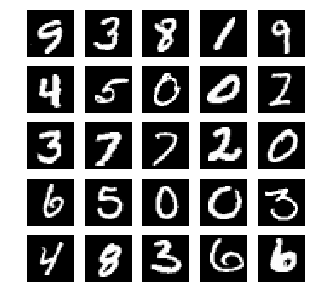

In [41]:
#plot the 25 images
plt.figure(figsize=(5,5))
for index in range(len(indexes)):
    plt.subplot(5,5,index+1)
    image=images[index]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

In [42]:
#Compute the number of labels
num_labels= len(np.unique(y_train))
num_labels

10

In [43]:
#Convert labels to one hot-vector

y_train= to_categorical(y_train)
y_test= to_categorical(y_test)

In [44]:
#image dimensions assumed to be square
img_size= x_train.shape[1]
input_size= img_size*img_size
input_size

784

In [45]:
#Resize and normalize the images
x_train= (np.reshape(x_train, [-1, input_size])/255.).astype('float32')
x_test= (np.reshape(x_test, [-1, input_size])/255.).astype('float32')

In [46]:
#network parameters
batch_size=256
hidden_units=256
dropout=0.45

In [47]:
#model is a 3-layer MLP with ReLU and Dropout after each layer

model= Sequential()
model.add(Dense(hidden_units, input_dim= input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
#This is the output for one-hot encoded vector
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 256)               200960    
_________________________________________________________________
activation_9 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_10 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                2570      
__________

In [48]:
plot_model(model, to_file='3_layer_MLP_MNIST.png', show_shapes=True)

![3_layer_mlp_mnist](https://user-images.githubusercontent.com/13174586/52229923-1b73c980-28dc-11e9-988d-f40b2f1ab68f.png)

In [49]:
#loss function for one hot vector using 
#adam optimizer
#accuracy is good metrics for calssification tasks

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [50]:
#train the network

model.fit(x_train, y_train, epochs=20, batch_size=batch_size, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 32us/step - loss: 0.5724 - acc: 0.8200 - val_loss: 0.1893 - val_acc: 0.9451
Epoch 2/20
48000/48000 [==============================] - 1s 20us/step - loss: 0.2374 - acc: 0.9293 - val_loss: 0.1336 - val_acc: 0.9611
Epoch 3/20
48000/48000 [==============================] - 1s 20us/step - loss: 0.1814 - acc: 0.9466 - val_loss: 0.1119 - val_acc: 0.9660
Epoch 4/20
48000/48000 [==============================] - 1s 19us/step - loss: 0.1480 - acc: 0.9554 - val_loss: 0.1002 - val_acc: 0.9703
Epoch 5/20
48000/48000 [==============================] - 1s 19us/step - loss: 0.1303 - acc: 0.9609 - val_loss: 0.0926 - val_acc: 0.9722
Epoch 6/20
48000/48000 [==============================] - 1s 19us/step - loss: 0.1126 - acc: 0.9645 - val_loss: 0.0871 - val_acc: 0.9731
Epoch 7/20
48000/48000 [==============================] - 1s 19us/step - loss: 0.1030 - acc: 0.9676 - val_loss: 0.0820 - val_acc

In [51]:
#validate the model on test dataset

loss, acc= model.evaluate(x_test, y_test, batch_size=batch_size)
print("Test Accuracy: %.1f%%" %(100.0*acc))

10000/10000 [==============================] - 0s 8us/step
Test Accuracy: 98.1%


In [59]:
#Implementing l2 regularizer

#model is a 3-layer MLP with ReLU and Dropout after each layer

model= Sequential()
model.add(Dense(hidden_units, kernel_regularizer=l2(0.001),input_dim= input_size))
model.add(Activation('relu'))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dense(num_labels))
#This is the output for one-hot encoded vector
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 256)               200960    
_________________________________________________________________
activation_15 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_16 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                2570      
_________________________________________________________________
activation_17 (Activation)   (None, 10)                0         
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [60]:
plot_model(model, to_file='3_layer_MLP_MNIST_l2_regularizer.png', show_shapes=True)

![3_layer_mlp_mnist_l2_regularizer](https://user-images.githubusercontent.com/13174586/52231924-267d2880-28e1-11e9-837e-6ac9efb6c16b.png)

In [61]:
#loss function for one hot vector using 
#adam optimizer
#accuracy is good metrics for calssification tasks

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [62]:
#train the network

model.fit(x_train, y_train, epochs=20, batch_size=batch_size, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 32us/step - loss: 0.5753 - acc: 0.8980 - val_loss: 0.3171 - val_acc: 0.9470
Epoch 2/20
48000/48000 [==============================] - 1s 20us/step - loss: 0.2608 - acc: 0.9583 - val_loss: 0.2279 - val_acc: 0.9632
Epoch 3/20
48000/48000 [==============================] - 1s 20us/step - loss: 0.1893 - acc: 0.9708 - val_loss: 0.1873 - val_acc: 0.9681
Epoch 4/20
48000/48000 [==============================] - 1s 20us/step - loss: 0.1525 - acc: 0.9763 - val_loss: 0.1622 - val_acc: 0.9707
Epoch 5/20
48000/48000 [==============================] - 1s 21us/step - loss: 0.1320 - acc: 0.9794 - val_loss: 0.1533 - val_acc: 0.9719
Epoch 6/20
48000/48000 [==============================] - 1s 21us/step - loss: 0.1212 - acc: 0.9803 - val_loss: 0.1387 - val_acc: 0.9748
Epoch 7/20
48000/48000 [==============================] - 1s 19us/step - loss: 0.1067 - acc: 0.9835 - val_loss: 0.1262 - val_acc

In [63]:
#validate the model on test dataset

loss, acc= model.evaluate(x_test, y_test, batch_size=batch_size)
print("Test Accuracy: %.1f%%" %(100.0*acc))

10000/10000 [==============================] - 0s 8us/step
Test Accuracy: 97.8%
